<a href="https://colab.research.google.com/github/MSURENDRAN/AIML_Machine_Learning_Lab/blob/main/2348527_lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score, roc_auc_score, cohen_kappa_score, matthews_corrcoef,
                             confusion_matrix, roc_curve, auc, precision_recall_curve)
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline




In [2]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

Data Preprocessing

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
for col in df.columns:
  df[col]=df[col].fillna(df[col].mode()[0])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Data Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])

2. Logistic Regression Model Building:

a. Split the dataset into training and testing sets (80% training, 20% testing).

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Churn', axis=1), df['Churn'], test_size=0.2, random_state=0)

b. Build a baseline logistic regression model using default settings.

In [15]:
# Build a baseline logistic regression model using default settings
baseline_model = LogisticRegression()

numeric_cols = X_train.select_dtypes(include='number').columns.tolist()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])

c. Train the model on the training data


In [16]:
baseline_model.fit(X_train_scaled, Y_train)

LogisticRegression()

In [17]:
X_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2920,6650,0,0,1,0,72,1,0,0,2,2,2,2,2,2,2,0,3,85.10,5023
2966,6109,0,1,0,0,14,0,1,0,0,0,0,0,2,2,0,1,2,46.35,5331
6099,5478,0,0,1,1,71,1,2,2,1,1,1,1,1,1,2,0,0,24.70,1363
5482,4462,1,0,1,1,33,1,0,0,0,0,2,2,2,2,1,1,3,73.90,2051
2012,4855,0,0,1,0,47,1,2,1,2,2,2,0,2,0,0,1,2,98.75,3859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,3002,1,0,1,0,15,1,2,1,0,0,2,2,2,2,0,1,2,103.45,971
3264,4838,0,0,0,1,10,1,0,1,0,0,2,2,2,0,0,1,2,91.10,6474
1653,4700,1,0,1,0,58,1,0,2,1,1,1,1,1,1,2,0,3,20.75,346
2607,3935,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,69.75,5451


3. Model Evaluation and Visualization

a. Evaluate the model's performance on the testing data


In [18]:
Y_pred = baseline_model.predict(X_test_scaled)
accuracy = print(accuracy_score(Y_test, Y_pred))
precision = print(precision_score(Y_test, Y_pred))
recall = print(recall_score(Y_test, Y_pred))
f1 = print(f1_score(Y_test, Y_pred))
roc_auc = print(roc_auc_score(Y_test, Y_pred))
kappa = print(cohen_kappa_score(Y_test, Y_pred))
mcc = print(matthews_corrcoef(Y_test, Y_pred))

0.7934705464868701
0.6370106761565836
0.48641304347826086
0.551617873651772
0.6942151672722716
0.42057021727609956
0.42702637836991847


b. Create a confusion matrix visualization


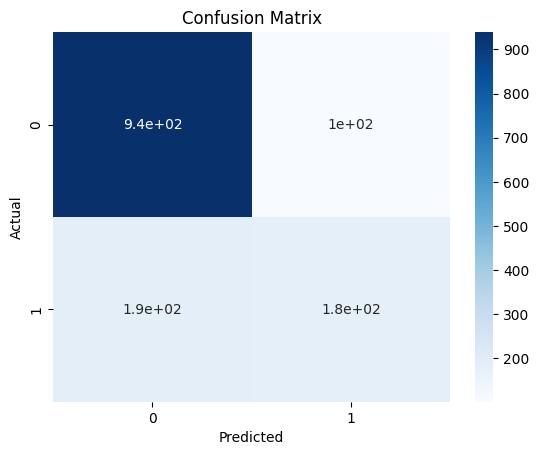

In [19]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

c. Plot the ROC curve and calculate the AUC


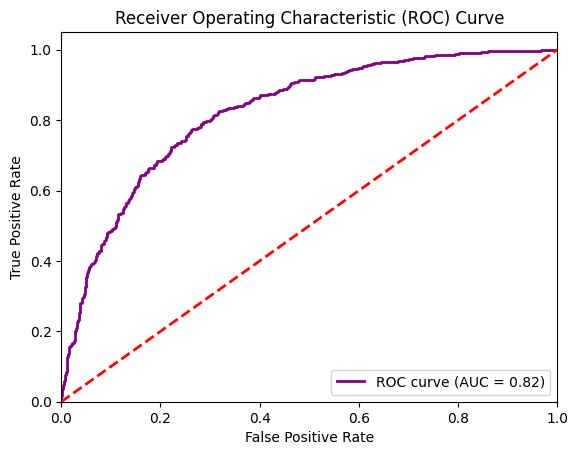

In [20]:
Y_probs = baseline_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, Y_probs)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='purple', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

d. Visualize the precision-recall curve

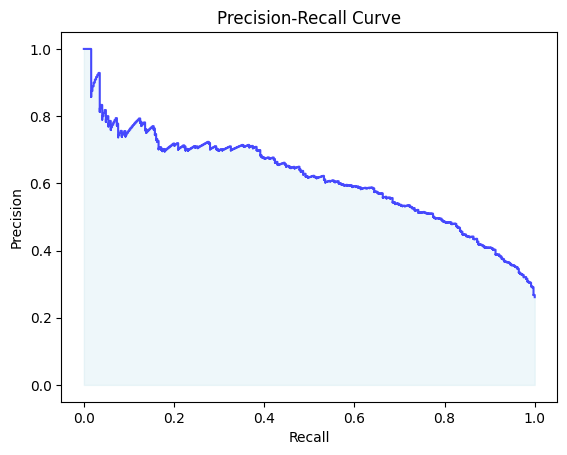

In [21]:
precision, recall, _ = precision_recall_curve(Y_test, Y_probs)
plt.figure()
plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='lightblue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

e. Plot the log loss function curve during model training.

In [22]:
from sklearn.metrics import log_loss
log_loss(Y_test, Y_probs)

0.4384004471884931

4. Sigmoid Curve

a. Visualization of the sigmoid curve


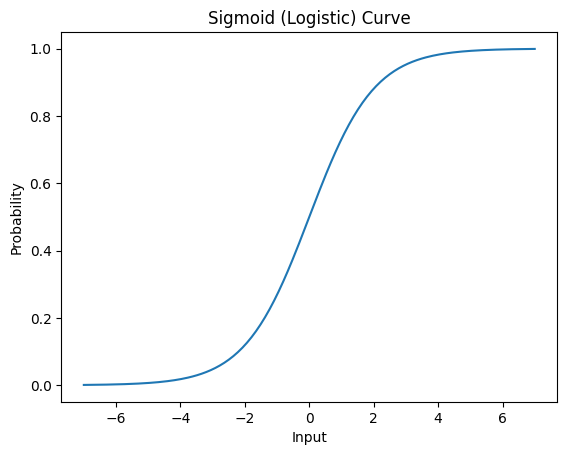

In [23]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

X_values = np.linspace(-7, 7, 200)
Y_values = sigmoid(X_values)
plt.plot(X_values, Y_values)
plt.title('Sigmoid (Logistic) Curve')
plt.xlabel('Input')
plt.ylabel('Probability')
plt.show()

5. Hyperparameter Tuning:

a. Perform hyperparameter tuning

In [24]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, Y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

6: Recommendations

In [25]:


# Based on your analysis, provide actionable recommendations to TelCoX on reducing customer churn.
# Analyze feature importance, gather more insights, and provide recommendations to reduce churn.

# Print best hyperparameters and evaluate the best model
print(f'Best Hyperparameters: {best_params}')
Y_pred_best = best_model.predict(X_test_scaled)
accuracy_best = accuracy_score(Y_test, Y_pred_best)
# Add other evaluation metrics as needed
print(f'Best Model Accuracy: {accuracy_best:.2f}')

Best Hyperparameters: {'C': 0.1}
Best Model Accuracy: 0.79
